In [1]:
#Importing dependencies
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#Models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [5]:
df = pd.read_csv("Data\Diamonds_Prices2022.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Exploratory Data Analysis

[Text(0.5, 0, 'Carat Size'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Carat Size vs. price')]

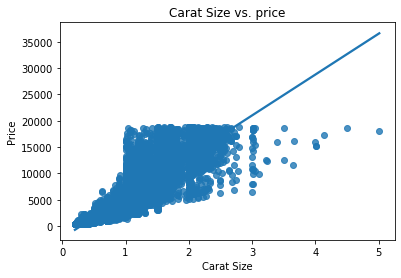

In [3]:
#Carat_Size vs Price. comparing the feature carat_size against the target variable Price
sns.regplot(data=df, x="carat", y="price").set(xlabel = "Carat Size", ylabel="Price", title="Carat Size vs. price")


In [4]:
#Observation: we see that carat and price are very highly correlated and also carat size values hover roughly between 
#0.1 and 3.
#can therefore confirm our correlation by displaying the correlation matrix so as to know if it will be included in our features

In [5]:
df[["price","carat"]].corr() #as we see this correlates with our plot as shown above so we include it.

,price,carat
price,1.000000,0.921591
carat,0.921591,1.000000


<AxesSubplot:xlabel='cut', ylabel='price'>

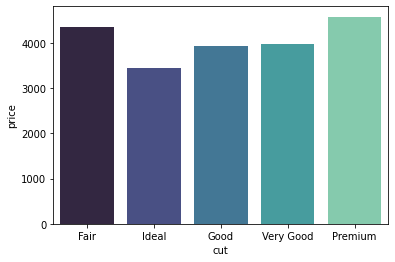

In [6]:
#Cut Vs Price
#df["cut"].unique()
cut_price = df.groupby("cut").price.mean().reset_index()
# cut_price
sns.barplot(data=cut_price,x="cut", y="price", palette="mako", order=["Fair","Ideal", "Good","Very Good","Premium"])

In [7]:
#Observation: the distribution is ununiform, therefore this can provide imperative information for the model
# Some Categores are very close to one another eg "good " and "Very Good" so it would be useful to combine them later on.


In [8]:
#Color Vs Price

In [9]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
df["color"].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [11]:
color_price = df.groupby("color").price.mean().reset_index()

<AxesSubplot:xlabel='color', ylabel='price'>

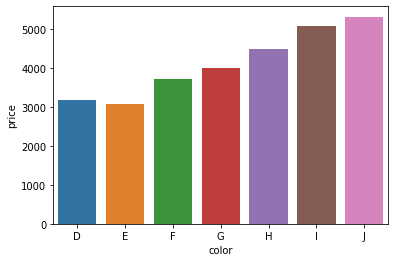

In [12]:
sns.barplot(data=color_price,x="color",y="price")

In [13]:
#Observation: We can see there is correlation between the color of diamond and price
#Again E and D are very close and will be better if there are combined before passing it to the model since their averages are
#     are roughly the  same.
#Indeed the feature will be useful in our model so we will include it.

In [14]:
#CLARITY vs PRICE

In [15]:
df["clarity"].value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [16]:
clarity_price = df.groupby("clarity").price.mean().reset_index()

In [17]:
clarity_price

,clarity,price
0,I1,3924.168691
1,IF,2864.839106
2,SI1,3995.811357
3,SI2,5063.028606
4,VS1,3839.455391
5,VS2,3924.894119
6,VVS1,2523.114637
7,VVS2,3283.737071


<AxesSubplot:xlabel='clarity', ylabel='price'>

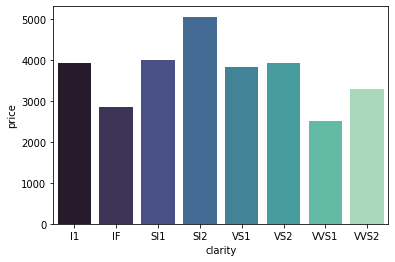

In [18]:
sns.barplot(data=clarity_price,x="clarity", y="price", palette="mako")

In [19]:
#Observation: we see there is plenty of variation however the I1,SI1, VS1, VS2 categories have similar average prices
#We will adjust the category by combining them
#It would be beneficial to make two set of models (one were we combine and another where we do not combine) to see if combining 
#    the categories bears fruit

In [20]:
#Depth Vs Price

<AxesSubplot:xlabel='depth', ylabel='price'>

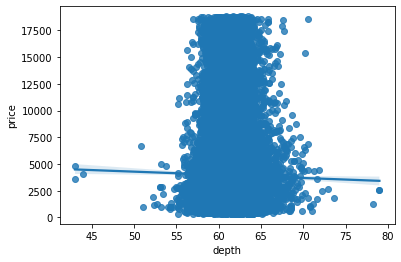

In [21]:
sns.regplot(x="depth",y="price", data=df)

In [22]:
df[["depth","price"]].corr()

,depth,price
depth,1.00000,-0.01063
price,-0.01063,1.00000


In [23]:
#Observation:as we can see there is very little observation between price and depth 
#And the slope of the regression is very close to zero
#for a depth between 50 and 70, the variation in price is crazy
#We can conclude that depth is not useful feature to include

<AxesSubplot:xlabel='table', ylabel='price'>

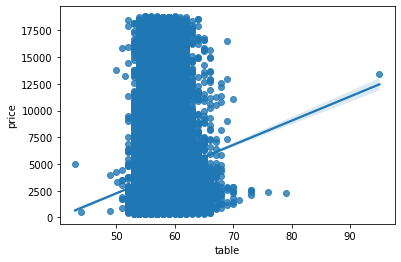

In [24]:
#Table and Price
sns.regplot(data=df,x="table",y="price")

In [25]:
#Observation: The best_fit line indicate a high correlation between table and price
#Yet the variation in price is so high between a table value of 50 and 70

In [26]:
df[["table","price"]].corr()

,table,price
table,1.000000,0.127118
price,0.127118,1.000000


In [27]:
#The correlation between these features isn't so high but including it will be fine.

In [28]:
#X, Y,and Z vs Price


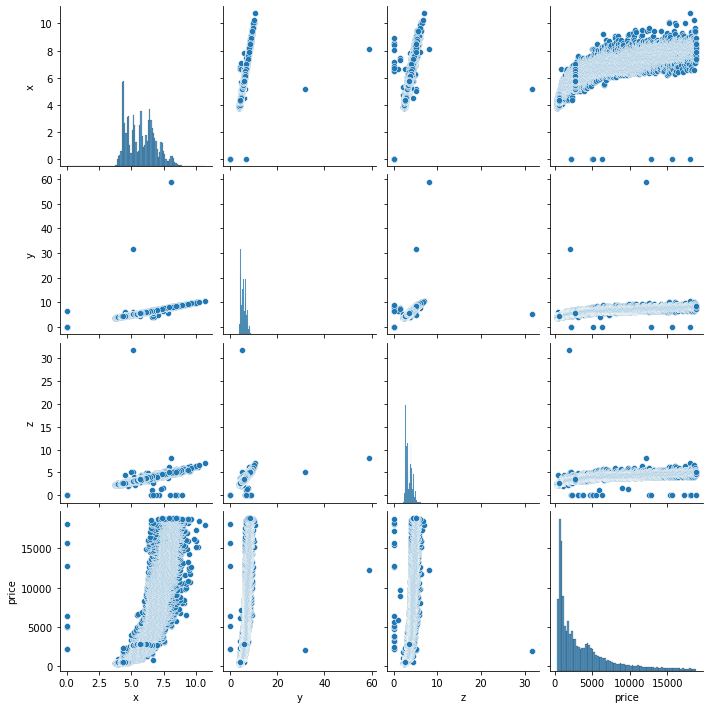

In [29]:
sns.pairplot(data=df[["x","y","z","price"]])

In [30]:
df[["x","y","z","price"]].corr()#confirming correlation

,x,y,z,price
x,1.000000,0.974701,0.970771,0.884433
y,0.974701,1.000000,0.952005,0.865419
z,0.970771,0.952005,1.000000,0.861249
price,0.884433,0.865419,0.861249,1.000000


In [31]:
#Observation: We see x , y and z are all highly correlated with price and also highly correlated with each other.
#For the model includig just one will be fine as x,y,z are highly correlated
#we will also remove some outliers from the x,y ,z features

In [32]:
#Since x has the highest correlation i will use x and omit y and z

In [33]:
df["volume"] = df["x"] * df["y"] * df["z"]
df[["volume", "x","y", "z", "price"]].corr()

,volume,x,y,z,price
volume,1.000000,0.956563,0.975142,0.950065,0.902385
x,0.956563,1.000000,0.974701,0.970771,0.884433
y,0.975142,0.974701,1.000000,0.952005,0.865419
z,0.950065,0.970771,0.952005,1.000000,0.861249
price,0.902385,0.884433,0.865419,0.861249,1.000000


In [34]:
#As we see "volume" as the highest correlation so we drop x,y,x and use volume

#SUMMARY OF EDA

#omit th depth feature 
#include the volume feature
#omit x, y, z features

In [35]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [36]:
#Normializing price
df["price"]= np.log(df["price"])

In [37]:
#Drop unnecessary features
df.drop(["x", "y", "z", "depth", "Unnamed: 0"], axis=1, inplace=True)

In [38]:
df.head()

,carat,cut,color,clarity,table,price,volume
0,0.23,Ideal,E,SI2,55.0,5.786897,38.202030
1,0.21,Premium,E,SI1,61.0,5.786897,34.505856
2,0.23,Good,E,VS1,65.0,5.789960,38.076885
3,0.29,Premium,I,VS2,58.0,5.811141,46.724580
4,0.31,Good,J,SI2,58.0,5.814131,51.917250


In [39]:
df.isnull().sum() #Null Values

carat      0
cut        0
color      0
clarity    0
table      0
price      0
volume     0
dtype: int64

In [40]:
#Encoding Categorical Variables.
df_encoded = pd.get_dummies(df)
df_encoded.head()

,carat,table,price,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,5.786897,38.202030,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,5.786897,34.505856,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,65.0,5.789960,38.076885,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,58.0,5.811141,46.724580,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,5.814131,51.917250,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [41]:
#TRAIN TEST SPLIT
X = df_encoded.copy().drop("price", axis = 1)
y = df_encoded.copy().pop("price")#the pop method removes the column as a pandas Series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [42]:
#MODEL TRAINING

In [45]:
#Utility function for scoring a particular model
def score_model(model, train_X, train_y):
    scores = -1 * cross_val_score(model, train_X, train_y, cv=5, scoring="neg_mean_absolute_error")
    print(f'{scores.mean()} ({scores.std()})')

In [47]:
#Utility function for test scores
def score_test(pred, real):
    return {"mean_squared_error": mean_squared_error(real, pred), "mean_absolute_error": mean_absolute_error(real, pred),
            "mean_absolute_percentage_error":mean_absolute_percentage_error(real, pred)}

### Model Performance

In [49]:
#Cross Validation for RandomForest
rf = RandomForestRegressor()
score_model(rf, X_train, y_train)

0.08443121271689923 (0.0006703233145185281)


In [50]:
#Test SEt
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score_test(y_pred, y_test)

{'mean_squared_error': 0.012874796993626493,
 'mean_absolute_error': 0.08481618392367617,
 'mean_absolute_percentage_error': 0.01137039083619702}

In [52]:
#Cross Validation for XGBoost
xgb = XGBRegressor()
score_model(xgb, X_train, y_train)

0.07830965960922151 (0.0008034948076094938)


In [53]:
#Test set
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
score_test(y_pred, y_test)

{'mean_squared_error': 0.010485874644794176,
 'mean_absolute_error': 0.07779610167073438,
 'mean_absolute_percentage_error': 0.010318559354460565}

In [55]:
#Cross Validation for LInearRegression
linreg = LinearRegression()
score_model(linreg, X_train, y_train)


0.2676943650768368 (0.0022832459637749957)


In [56]:
#Test set
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
score_test(y_pred, y_test)
confu

{'mean_squared_error': 0.11480630820653462,
 'mean_absolute_error': 0.26785146016924005,
 'mean_absolute_percentage_error': 0.03473960831364871}

In [ ]:
#We can th tune the parameter using the hyperparameter tuners such as GridSearchCV or RandomSearchCV or Optuna.


# <li> Thanks</li>